# Sales Analysis

In [34]:
import matplotlib
import pandas as pd
import os
from matplotlib import pyplot as plt

# Task 1: Merge the 12 months of sales into a single CSV files

In [35]:
df = pd.read_csv('data/sales_data/Sales_April_2019.csv')

In [36]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [37]:
all_months_df = pd.DataFrame()
files_list = [filename for filename in os.listdir('data/sales_data')]

for filename in files_list:
    temp_df = pd.read_csv('data/sales_data/' + filename)
    all_months_df = pd.concat(
        objs=[all_months_df, temp_df],
        axis=0,
    )

In [38]:
all_months_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


# Clean up the dataframe, delete all NaN's

In [39]:
all_months_df = all_months_df.dropna(how='all')

# Save the all data dataframe to csv

In [40]:
all_months_df.to_csv('data/output/all_months_data.csv', index=False)

# Augment data with additional columns

# Task 2: Add month column

In [41]:
all_months_df['Order Date'].head()

0    04/19/19 08:46
2    04/07/19 22:30
3    04/12/19 14:38
4    04/12/19 14:38
5    04/30/19 09:27
Name: Order Date, dtype: object

In [42]:
all_months_df['Order Date'] = all_months_df['Order Date'].astype('str')

In [43]:
indices = all_months_df[all_months_df['Order Date'] == 'Order Date'].index
print(
    indices
)

Int64Index([  519,  1149,  1155,  2878,  2893,  3036,  3209,  3618,  4138,
             4645,
            ...
             8644,  9325,  9502,  9615,  9954, 10000, 10387, 11399, 11468,
            11574],
           dtype='int64', length=355)


# Task 3: Drop all rows with date='Order Date' (not datetime format)

In [44]:
all_months_df = all_months_df.drop(indices)

In [45]:
all_months_df['Month'] = pd.DatetimeIndex(all_months_df['Order Date']).month

In [46]:
print(all_months_df.iloc[:5])

  Order ID                     Product Quantity Ordered Price Each  \
0   176558        USB-C Charging Cable                2      11.95   
2   176559  Bose SoundSport Headphones                1      99.99   
3   176560                Google Phone                1        600   
4   176560            Wired Headphones                1      11.99   
5   176561            Wired Headphones                1      11.99   

       Order Date                      Purchase Address  Month  
0  04/19/19 08:46          917 1st St, Dallas, TX 75001      4  
2  04/07/19 22:30     682 Chestnut St, Boston, MA 02215      4  
3  04/12/19 14:38  669 Spruce St, Los Angeles, CA 90001      4  
4  04/12/19 14:38  669 Spruce St, Los Angeles, CA 90001      4  
5  04/30/19 09:27     333 8th St, Los Angeles, CA 90001      4  


In [47]:
print(all_months_df['Month'].dtypes)

int64


# Task 4: Add a sales column

In [48]:
all_months_df['Quantity Ordered'] = pd.to_numeric(all_months_df['Quantity Ordered']) # convert to int
all_months_df['Price Each'] = pd.to_numeric(all_months_df['Price Each'])

In [49]:
all_months_df['Sales'] = all_months_df['Quantity Ordered'] * all_months_df['Price Each']

In [50]:
all_months_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99


# Question 1: What was the best month for sales? How much was earned that month?

In order to see the sales for each month, we need to group the DataFrame and sum the parameters during a single month.

In [51]:
monthly = all_months_df[['Month', 'Sales']].groupby('Month').sum()
print(monthly)

              Sales
Month              
1      1.786511e+06
2      2.158127e+06
3      2.755969e+06
4      3.336376e+06
5      3.101881e+06
6      2.524465e+06
7      2.587445e+06
8      2.191698e+06
9      2.050361e+06
10     3.679254e+06
11     3.149785e+06
12     4.557905e+06


Best month for sales

In [52]:
best_month_index = monthly['Sales'].argmax()
print('Best month for sales is:', monthly.iloc[best_month_index].name)
print(f'Revenue for {best_month_index + 1} is {round(monthly.iloc[best_month_index, 0], 2)} USD[$]')

Best month for sales is: 12
Revenue for 12 is 4557905.42 USD[$]


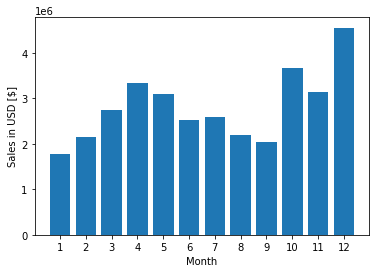

In [53]:
months = list(monthly.index)
plt.bar(
    x=months,
    height=monthly['Sales'],
)
plt.xticks(months)
plt.xlabel('Month'), plt.ylabel('Sales in USD [$]')
plt.show()

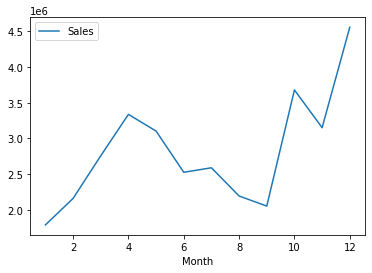

In [54]:
monthly.plot()
plt.show()

# Task 5: Add a city column

Use the DataFrame apply(condition).

In [55]:
def get_city(address: str) -> str:
    return address.split(',')[1].strip()

In [56]:
def get_state(address: str) -> str:
    postal = address.split(',')[2]
    return postal.split()[0]

In [57]:
all_months_df['City'] = all_months_df['Purchase Address']\
    .apply(lambda address: f'{get_city(address)} ({get_state(address)})')

In [58]:
all_months_df['City']

0               Dallas (TX)
2               Boston (MA)
3          Los Angeles (CA)
4          Los Angeles (CA)
5          Los Angeles (CA)
                ...        
11681      Los Angeles (CA)
11682    San Francisco (CA)
11683    San Francisco (CA)
11684    San Francisco (CA)
11685    San Francisco (CA)
Name: City, Length: 182735, dtype: object

# Task 6: Add a State column

# What city had the highest number of sales?

In [59]:
by_city = all_months_df[['City', 'Sales']].groupby('City').sum()

In [60]:
by_city.head()

,Sales
City,
Atlanta (GA),2.741642e+06
Austin (TX),1.786746e+06
Boston (MA),3.604081e+06
Dallas (TX),2.717794e+06
Los Angeles (CA),5.354040e+06


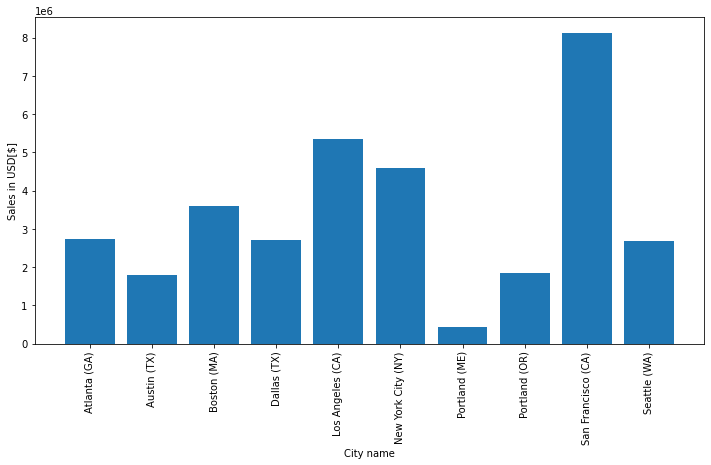

In [61]:
cities = list(by_city.index)
plt.figure(figsize=(12, 6))
plt.bar(
    x=cities,
    height=by_city['Sales']
)
plt.xticks(cities, rotation='vertical')
plt.xlabel('City name'), plt.ylabel('Sales in USD[$]')
plt.show()

In [62]:
best_city = by_city['Sales'].argmax()
print(f'City with the highest number of sales is {by_city.iloc[best_city].name}')

City with the highest number of sales is San Francisco (CA)


# Question 3: What time should we display advertisements to maximize likelihood of customer's buying product?

In [63]:
all_months_df['Hours'] = pd.DatetimeIndex(all_months_df['Order Date']).hour
all_months_df['Minute'] = pd.DatetimeIndex(all_months_df['Order Date']).minute

In [64]:
by_hours = all_months_df[['Hours', 'Product']].groupby('Hours').count()
by_hours.columns = ['Orders']
print(by_hours)

       Orders
Hours        
0        3844
1        2313
2        1227
3         816
4         843
5        1293
6        2445
7        3945
8        6184
9        8583
10      10721
11      12202
12      12360
13      11913
14      10810
15       9981
16      10179
17      10702
18      12074
19      12685
20      12040
21      10738
22       8663
23       6174


In [65]:
best_hour = by_hours['Orders'].argmax()
print(f'Hour with highest number of orders is {by_hours.iloc[best_hour].name}')

Hour with highest number of orders is 19


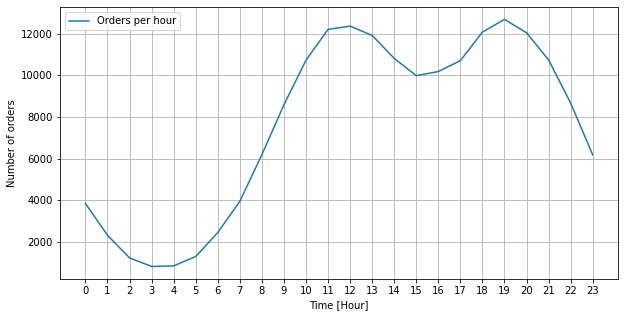

In [66]:
hours = list(by_hours.index)
plt.figure(figsize=(10, 5))
plt.plot(
    hours,
    by_hours['Orders'],
    label='Orders per hour'
)
plt.xticks(hours)
plt.xlabel('Time [Hour]'), plt.ylabel('Number of orders')
plt.legend()
plt.grid(True)
plt.show()

# Question 3: What Products are most often sold together?

In [140]:
same_orders = all_months_df[['Product', 'Order ID']]
same_orders = same_orders[same_orders['Order ID'].duplicated(keep=False)] # leave only duplicated Order ID
print(same_orders.iloc[:10])

                        Product Order ID
3                  Google Phone   176560
4              Wired Headphones   176560
18                 Google Phone   176574
19         USB-C Charging Cable   176574
30   Bose SoundSport Headphones   176585
31   Bose SoundSport Headphones   176585
32       AAA Batteries (4-pack)   176586
33                 Google Phone   176586
119    Lightning Charging Cable   176672
120        USB-C Charging Cable   176672


In [141]:
same_orders['Grouped'] = same_orders.groupby('Order ID').transform(lambda product: ', '.join(product))
print(same_orders.iloc[:10])

                        Product Order ID  \
3                  Google Phone   176560   
4              Wired Headphones   176560   
18                 Google Phone   176574   
19         USB-C Charging Cable   176574   
30   Bose SoundSport Headphones   176585   
31   Bose SoundSport Headphones   176585   
32       AAA Batteries (4-pack)   176586   
33                 Google Phone   176586   
119    Lightning Charging Cable   176672   
120        USB-C Charging Cable   176672   

                                               Grouped  
3                       Google Phone, Wired Headphones  
4                       Google Phone, Wired Headphones  
18                  Google Phone, USB-C Charging Cable  
19                  Google Phone, USB-C Charging Cable  
30   Bose SoundSport Headphones, Bose SoundSport He...  
31   Bose SoundSport Headphones, Bose SoundSport He...  
32                AAA Batteries (4-pack), Google Phone  
33                AAA Batteries (4-pack), Google Phone  
11

In [144]:
same_orders = same_orders[['Order ID', 'Grouped']].drop_duplicates().set_index('Order ID')
print(same_orders.iloc[:10])

                                                    Grouped
Order ID                                                   
176560                       Google Phone, Wired Headphones
176574                   Google Phone, USB-C Charging Cable
176585    Bose SoundSport Headphones, Bose SoundSport He...
176586                 AAA Batteries (4-pack), Google Phone
176672       Lightning Charging Cable, USB-C Charging Cable
176681            Apple Airpods Headphones, ThinkPad Laptop
176689    Bose SoundSport Headphones, AAA Batteries (4-p...
176739                 34in Ultrawide Monitor, Google Phone
176774       Lightning Charging Cable, USB-C Charging Cable
176781                     iPhone, Lightning Charging Cable


In [138]:
from itertools import combinations
from collections import Counter

In [161]:
product_counter = Counter()
for products in same_orders['Grouped']:
    products_list = products.split(', ')
    product_counter.update(
        Counter(
            combinations(products_list, 2)
        )
    )

product_pairs = []
order_numbers = []

for key, val in product_counter.most_common(10):
    product_pairs.append(', '.join(key))
    order_numbers.append(val)
    print(key, val)

('iPhone', 'Lightning Charging Cable') 973
('Google Phone', 'USB-C Charging Cable') 954
('iPhone', 'Wired Headphones') 437
('Google Phone', 'Wired Headphones') 401
('Vareebadd Phone', 'USB-C Charging Cable') 348
('iPhone', 'Apple Airpods Headphones') 343
('Google Phone', 'Bose SoundSport Headphones') 219
('USB-C Charging Cable', 'Wired Headphones') 156
('Vareebadd Phone', 'Wired Headphones') 141
('Lightning Charging Cable', 'Wired Headphones') 92


In [157]:
print(product_pairs)
print(order_numbers)

['iPhone, Lightning Charging Cable', 'Google Phone, USB-C Charging Cable', 'iPhone, Wired Headphones', 'Google Phone, Wired Headphones', 'Vareebadd Phone, USB-C Charging Cable', 'iPhone, Apple Airpods Headphones', 'Google Phone, Bose SoundSport Headphones', 'USB-C Charging Cable, Wired Headphones', 'Vareebadd Phone, Wired Headphones', 'Lightning Charging Cable, Wired Headphones']
[973, 954, 437, 401, 348, 343, 219, 156, 141, 92]


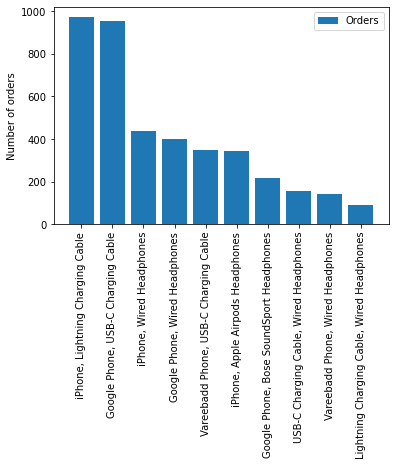

In [162]:
plt.bar(
    x=product_pairs,
    height=order_numbers,
    label='Orders'
)
plt.xticks(rotation='vertical')
plt.ylabel('Number of orders')
plt.legend()
plt.show()

# Question 4: Which product had the highest order number?

In [165]:
most_products = all_months_df[['Product', 'Quantity Ordered']].groupby('Product').sum()
print(most_products.iloc[:10])

                            Quantity Ordered
Product                                     
20in Monitor                            4058
27in 4K Gaming Monitor                  6134
27in FHD Monitor                        7429
34in Ultrawide Monitor                  6076
AA Batteries (4-pack)                  27148
AAA Batteries (4-pack)                 30487
Apple Airpods Headphones               15383
Bose SoundSport Headphones             13236
Flatscreen TV                           4724
Google Phone                            5440


In [174]:
all_months_df['Price Each'] = pd.to_numeric(all_months_df['Price Each'])
print(all_months_df['Price Each'].dtypes)

float64


In [183]:
# Group by the same product and return mean prices
prices = all_months_df[['Product', 'Price Each']].groupby('Product').mean()
print(prices.iloc[:10])

                            Price Each
Product                               
20in Monitor                    109.99
27in 4K Gaming Monitor          389.99
27in FHD Monitor                149.99
34in Ultrawide Monitor          379.99
AA Batteries (4-pack)             3.84
AAA Batteries (4-pack)            2.99
Apple Airpods Headphones        150.00
Bose SoundSport Headphones       99.99
Flatscreen TV                   300.00
Google Phone                    600.00


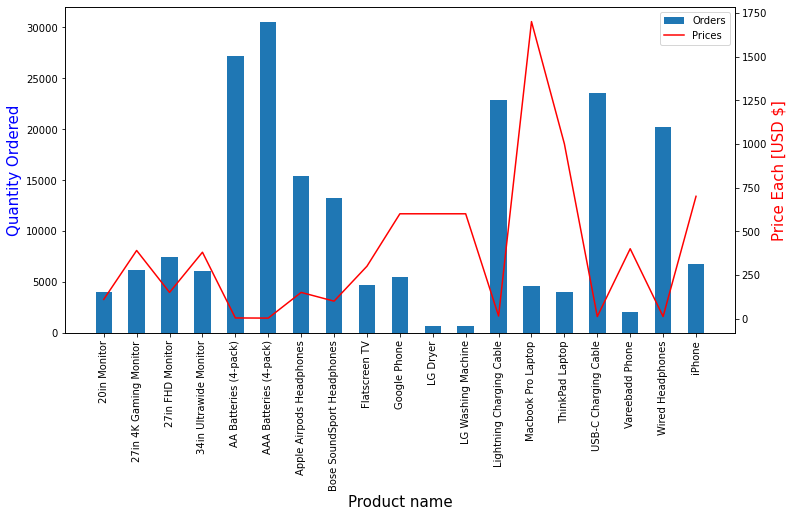

In [210]:
product_names = list(most_products.index)

fig = plt.figure(figsize=(12, 6))

ax1 = fig.add_subplot()
ax2 = ax1.twinx()

bar1 = ax1.bar(
    x=product_names,
    height=most_products['Quantity Ordered'],
    width=0.5,
    label='Orders',
)
plot2 = ax2.plot(
    product_names,
    prices['Price Each'],
    color='r',
    label='Prices'
)

ax1.set_xticklabels(product_names, rotation='vertical')
ax1.set_xlabel('Product name')

ax1.set_ylabel('Quantity Ordered', color='b', size=8)
ax2.set_ylabel('Price Each [USD $]', color='r', size=8)

ax1.yaxis.label.set_size(15)
ax1.xaxis.label.set_size(15)
ax2.yaxis.label.set_size(15)

fig.legend(loc="upper right", bbox_to_anchor=(1,1), bbox_transform=ax1.transAxes)

plt.show()